In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_nback_data(csv_file, rolling_window=5):
    # Read the data
    df = pd.read_csv(csv_file)

    # Convert RT to numeric (if it's not already)
    # Some rows may have missing RT, so we coerce errors and drop NAs after
    df['RT'] = pd.to_numeric(df['RT'], errors='coerce')

    # Drop rows without RT (e.g., no response trials or missing values)
    df = df.dropna(subset=['RT'])

    # Extract trial, n-back, and RT
    trials = df['Trial']
    rt = df['RT']
    nback = df['N-back']

    # Compute a rolling mean of RT
    # Note: rolling_window defines how many trials are averaged at once.
    rt_rolling = rt.rolling(rolling_window, min_periods=1).mean()

    # Identify points where N-back changes
    # We'll find the trial indices where N-back differs from the previous row
    # and mark those as vertical lines.
    nback_changes = df.loc[df['N-back'].diff() != 0, 'Trial'].values

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot individual RT points
    plt.scatter(trials, rt, color='blue', alpha=0.5, label='Individual RT')

    # Plot rolling mean
    plt.plot(trials, rt_rolling, color='red', linewidth=2, label=f'Rolling Mean ({rolling_window})')

    # Add vertical lines for N-back changes
    for change_point in nback_changes:
        plt.axvline(x=change_point, color='green', linestyle='--', linewidth=1, label='N-back change')

    # Add labels and legend
    plt.xlabel('Trial Number')
    plt.ylabel('Reaction Time (s)')
    plt.title('Reaction Times Across Trials with Rolling Mean')
    # To prevent multiple identical legends for lines, we use a trick:
    handles, labels = plt.gca().get_legend_handles_labels()
    # Deduplicate legend entries (this can happen due to multiple vlines)
    from collections import OrderedDict
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage:
# plot_nback_data("data.csv", rolling_window=5)


Most recent file: C:/Users/tue.vu_pison/Desktop/git/NBack/data\data_tue_01.csv


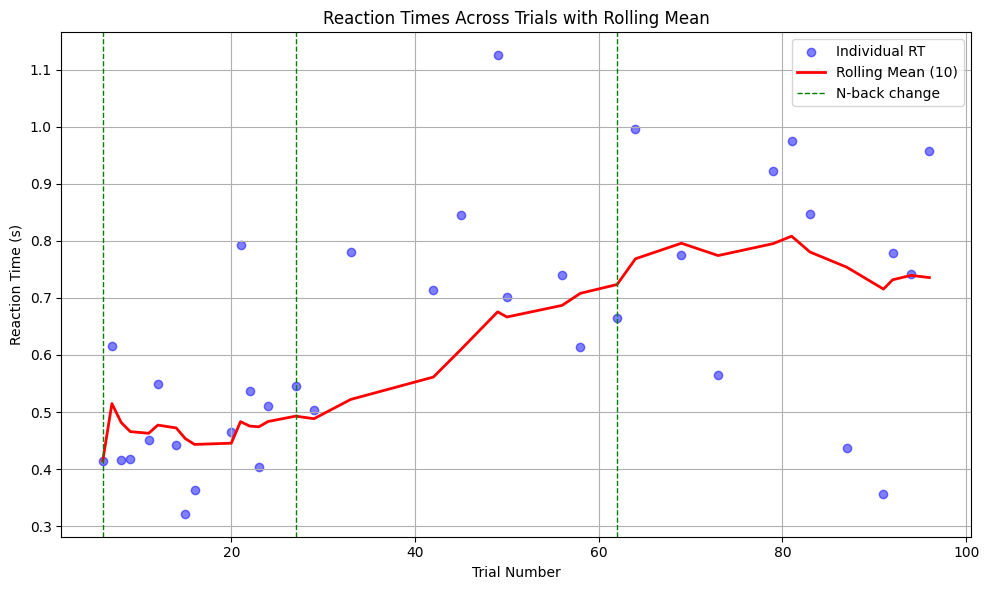

In [9]:
import glob
import os

directory = "C:/Users/tue.vu_pison/Desktop/git/NBack/data/"
pattern = "*.csv"
files = glob.glob(os.path.join(directory, pattern))

if files:
    most_recent_file = max(files, key=os.path.getmtime)
    print("Most recent file:", most_recent_file)
    plot_nback_data(most_recent_file, rolling_window=10)
else:
    print("No files found matching the pattern.")